In [1]:
!wget  https://raw.githubusercontent.com/googlefonts/noto-fonts/main/hinted/ttf/NotoSansMono/NotoSansMono-Black.ttf

--2021-12-22 21:05:54--  https://raw.githubusercontent.com/googlefonts/noto-fonts/main/hinted/ttf/NotoSansMono/NotoSansMono-Black.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 530544 (518K) [application/octet-stream]
Saving to: ‘NotoSansMono-Black.ttf’

NotoSansMono-Black. 100%[===================>] 518.11K  --.-KB/s    in 0.04s   

2021-12-22 21:05:55 (13.4 MB/s) - ‘NotoSansMono-Black.ttf’ saved [530544/530544]



In [2]:
!wget http://unifoundry.com/pub/unifont/unifont-14.0.01/font-builds/unifont-14.0.01.ttf

--2021-12-22 21:05:58--  http://unifoundry.com/pub/unifont/unifont-14.0.01/font-builds/unifont-14.0.01.ttf
Resolving unifoundry.com (unifoundry.com)... 107.180.4.157
Connecting to unifoundry.com (unifoundry.com)|107.180.4.157|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12273956 (12M) [font/ttf]
Saving to: ‘unifont-14.0.01.ttf’

unifont-14.0.01.ttf 100%[===================>]  11.71M  23.4MB/s    in 0.5s    

2021-12-22 21:05:59 (23.4 MB/s) - ‘unifont-14.0.01.ttf’ saved [12273956/12273956]



In [4]:
!unzip Special_Elite.zip

Archive:  Special_Elite.zip
  inflating: LICENSE.txt             
  inflating: SpecialElite-Regular.ttf  


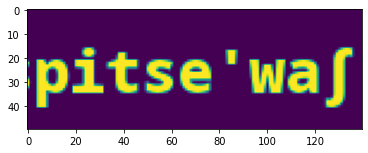

In [5]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt 

def make_text_img_bw(text,font_size=30,font = 'NotoSansMono-Black.ttf'):
  image_width = 140
  image_height = 50
  img = Image.new('L', (image_width, image_height), color=(0))
  canvas = ImageDraw.Draw(img)
  font = ImageFont.truetype(font, size=font_size)
  text_width, text_height = canvas.textsize(text, font=font)
  x_pos = int((image_width - text_width) / 2)
  y_pos = int((image_height - text_height) / 2)
  # canvas.text((x_pos, y_pos), "Hello World", font=font, fill='#FFFFFF')
  canvas.text((x_pos,y_pos), text, font=font, fill=255)
  return img 

im = make_text_img_bw("spitse'waʃ ",font_size=25,font='NotoSansMono-Black.ttf')
plt.imshow(im)

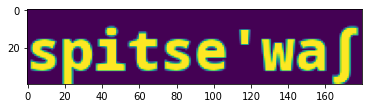

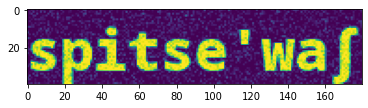

180


In [6]:
import numpy as np

text = "spitse'waʃ"
font = 'NotoSansMono-Black.ttf'
# font = 'unifont-14.0.01.ttf'

image_width = 180
image_height = 50
img = Image.new('L', (image_width, image_height), color=(0))
canvas = ImageDraw.Draw(img)
font = ImageFont.truetype(font, size=30)
text_width, text_height = canvas.textsize(text, font=font)
x_pos = int((image_width - text_width) / 2)
y_pos = int((image_height - text_height) / 2)
# canvas.text((x_pos, y_pos), "Hello World", font=font, fill='#FFFFFF')
canvas.text((0,0), text, font=font, fill=255,align='left')
img = np.array(img)[:text_height,:text_width]
plt.imshow(img)
plt.show()

from skimage.util import random_noise

plt.imshow(random_noise(img))
plt.show()
print(text_width)

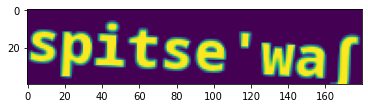

In [11]:
import skimage.transform as sktf 

rot = sktf.rotate(img,-3.2)
plt.imshow(rot)

1.0


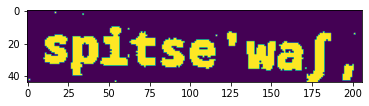

In [174]:
def make_text_image2(text,angle = 0,font='NotoSansMono-Black.ttf',font_size=30,add_noise=True):
  image_width = 1
  image_height = 1
  img = Image.new('L', (image_width, image_height), color=(0))
  canvas = ImageDraw.Draw(img)
  font = ImageFont.truetype(font, size=font_size)
  text_width, text_height = canvas.textsize(text, font=font)
  x = text_width//2 
  y = text_height//2 
  angle2 = abs(angle)
  x0 = x*np.cos(np.radians(angle2)) - y*np.sin(np.radians(angle2))
  y0 = x*np.sin(np.radians(angle2)) + y*np.cos(np.radians(angle2))
  x0 = int(x0) - x
  y0 = int(y0) - y
  img = Image.new('L', (text_width+(x0*2)+10, text_height+(y0*2)), color=(0))#add a little padding
  canvas = ImageDraw.Draw(img)
  canvas.text((x0+10,(y0)), text, font=font, fill=255,align='left')
  img = np.array(img)
  img = sktf.rotate(img,angle)
  if add_noise:
    img = random_noise(img)

  return img

fonts = ['NotoSansMono-Black.ttf','Arimo-Italic.ttf','unifont-14.0.01.ttf']

def make_random_image(text):
  angle = np.random.random()*10 -5
  return make_text_image2(text,angle=angle,font_size=30,)


text = "spitse'waʃ,"

im = make_random_image(text)
print(np.amax(im))
plt.imshow(im>0.3)

In [93]:
!wget https://raw.githubusercontent.com/googlefonts/noto-fonts/main/hinted/ttf/Arimo/Arimo-Italic.ttf

--2021-12-22 21:52:28--  https://raw.githubusercontent.com/googlefonts/noto-fonts/main/hinted/ttf/Arimo/Arimo-Italic.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 324764 (317K) [application/octet-stream]
Saving to: ‘Arimo-Italic.ttf’

Arimo-Italic.ttf    100%[===================>] 317.15K  --.-KB/s    in 0.03s   

2021-12-22 21:52:29 (9.19 MB/s) - ‘Arimo-Italic.ttf’ saved [324764/324764]



1.0


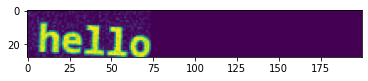

In [240]:
fonts = ['NotoSansMono-Black.ttf','Arimo-Italic.ttf','SpecialElite-Regular.ttf']

def make_random_image(text):
  angle = np.random.random()*10 -5
  font = np.random.choice(fonts)
  im = make_text_image2(text,angle=angle,font_size=30,font=font)
  return im

text = "hello"

im = make_random_image(text)
print(np.amax(im))
plt.imshow(format_image(im,(28,200)))

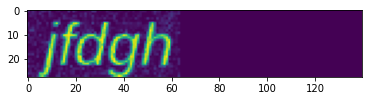

In [219]:
# import skimage
def format_image(im,out_shape):
  factor = out_shape[0]/im.shape[0]
  im2 = sktf.resize(im,(out_shape[0],int(factor*im.shape[1])))
  assert im2.shape[1] <= out_shape[1]
  out = np.zeros(out_shape)
  out[:,:im2.shape[1]] = im2
  return out 


plt.imshow(format_image(im,(28,140)))

# Text Image Generator 

A script to produce machine data for ML training 

In [1]:
!wget https://raw.githubusercontent.com/googlefonts/noto-fonts/main/hinted/ttf/Arimo/Arimo-Italic.ttf

--2021-12-22 22:21:48--  https://raw.githubusercontent.com/googlefonts/noto-fonts/main/hinted/ttf/Arimo/Arimo-Italic.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 324764 (317K) [application/octet-stream]
Saving to: ‘Arimo-Italic.ttf’

Arimo-Italic.ttf    100%[===================>] 317.15K  --.-KB/s    in 0.01s   

2021-12-22 22:21:48 (21.4 MB/s) - ‘Arimo-Italic.ttf’ saved [324764/324764]



In [58]:
!wget  https://raw.githubusercontent.com/googlefonts/noto-fonts/main/hinted/ttf/NotoSansMono/NotoSansMono-Black.ttf

--2021-12-22 22:55:13--  https://raw.githubusercontent.com/googlefonts/noto-fonts/main/hinted/ttf/NotoSansMono/NotoSansMono-Black.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 530544 (518K) [application/octet-stream]
Saving to: ‘NotoSansMono-Black.ttf’

NotoSansMono-Black. 100%[===================>] 518.11K  --.-KB/s    in 0.02s   

2021-12-22 22:55:14 (28.1 MB/s) - ‘NotoSansMono-Black.ttf’ saved [530544/530544]



1.0


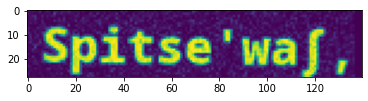

In [59]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt 
import numpy as np 
from skimage.util import random_noise
import skimage.transform as sktf 


def make_text_image2(text,angle = 0,font='NotoSansMono-Black.ttf',font_size=30,add_noise=True):
  image_width = 1
  image_height = 1
  img = Image.new('L', (image_width, image_height), color=(0))
  canvas = ImageDraw.Draw(img)
  font = ImageFont.truetype(font, size=font_size)
  text_width, text_height = canvas.textsize(text, font=font)
  x = text_width//2 
  y = text_height//2 
  angle2 = abs(angle)
  x0 = x*np.cos(np.radians(angle2)) - y*np.sin(np.radians(angle2))
  y0 = x*np.sin(np.radians(angle2)) + y*np.cos(np.radians(angle2))
  x0 = int(x0) - x
  y0 = int(y0) - y
  img = Image.new('L', (text_width+(x0*2)+10, text_height+(y0*2)), color=(0))#add a little padding
  canvas = ImageDraw.Draw(img)
  canvas.text((x0+10,(y0)), text, font=font, fill=255,align='left')
  img = np.array(img)
  img = sktf.rotate(img,angle)
  if add_noise:
    img = random_noise(img)

  return img

# fonts = ['NotoSansMono-Black.ttf','Arimo-Italic.ttf','unifont-14.0.01.ttf']

fonts = ['Arimo-Italic.ttf','NotoSansMono-Black.ttf']

def make_random_image(text,max_ang=5):
  angle = np.random.random()*(max_ang*2) -max_ang
  font = np.random.choice(fonts)
  return make_text_image2(text,angle=angle,font_size=30,font=font)

def format_image(im,out_shape):
  factor = out_shape[0]/im.shape[0]
  im2 = sktf.resize(im,(out_shape[0],int(factor*im.shape[1])))
  assert im2.shape[1] <= out_shape[1]
  out = np.zeros(out_shape)
  out[:,:im2.shape[1]] = im2
  return out 


text = "Spitse'waʃ,"

im = make_random_image(text)
print(np.amax(im))
plt.imshow(format_image(im,(28,140)))

In [60]:
import torch
import torchvision
from torchvision import transforms, datasets
import numpy as np

chars = ' 0123456789abcdefghijklmnopqrstuvwxyz'

epochs = 5
num_classes = 38
blank_label = 0
image_height = 28
gru_hidden_size = 128
gru_num_layers = 2
cnn_output_height = 4
cnn_output_width = 32
digits_per_sequence = 5
number_of_sequences = 10000
dataset_sequences = []
dataset_labels = []

def indicies_to_img(inds):
  sen = '' 
  for i in inds:
    sen+=chars[i]
  im = make_random_image(sen)
  im = format_image(im,(28,140))
  return im

def pad(a,size):
  out = np.zeros(size)
  for i,el in enumerate(a):
    out[i] = el
  return out

for i in range(number_of_sequences):
    number_of_chars = np.random.randint(1,digits_per_sequence+1)
    random_indices = np.random.randint(36, size=(number_of_chars,))+1
    im = indicies_to_img(random_indices)
    # print(random_indices)
    # plt.imshow(im)
    # plt.show()
    img = transforms.ToTensor()(im).numpy()
    random_indices = pad(random_indices,digits_per_sequence)
    dataset_sequences.append(img)
    dataset_labels.append(random_indices)

In [61]:
batch_size = 200

dataset_data = torch.Tensor(np.array(dataset_sequences))
dataset_labels = torch.IntTensor(np.array(dataset_labels))

seq_dataset = torch.utils.data.TensorDataset(dataset_data, dataset_labels)
train_set, val_set = torch.utils.data.random_split(seq_dataset,
                                                   [int(len(seq_dataset) * 0.8), int(len(seq_dataset) * 0.2)])

train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=1, shuffle=True)

In [20]:
from torch import optim,nn
class CRNNBase(nn.Module):
  def __init__(self,input_shape,gru_hidden_size,gru_num_layers,num_classes):
    super(CRNNBase, self).__init__()
    self.input_shape = input_shape
    self.gru_hidden_size = gru_hidden_size
    self.gru_num_layers = gru_num_layers
    self.num_classes = num_classes
    self.fc = nn.Linear(gru_hidden_size * 2, num_classes)
    self.log_softmax = nn.LogSoftmax(dim=-1)
  
  def calculate_output_sizes(self):
    self.cnn_out_shape = self.conv_layer(torch.zeros(self.input_shape)).shape
    self.gru_input_size = self.cnn_out_shape[1]*self.cnn_out_shape[2]
  

  def forward(self,x):
    batch_size = x.shape[0]
    out = self.conv_layer(x)
    out = out.reshape(batch_size, -1, self.gru_input_size)
    out,_= self.rnn_layer(out)
    out = self.dense_layer(out)
    out = torch.stack([self.log_softmax(out[i]) for i in range(out.shape[0])])
    target_lengths = input_lengths = torch.IntTensor(batch_size).fill_(out.shape[1])
    return out,target_lengths

In [21]:
class CRNN4(CRNNBase):
  def __init__(self,input_shape,gru_hidden_size=256,gru_num_layers=3,num_classes=27):
    super(CRNN4, self).__init__(input_shape,gru_hidden_size,gru_num_layers,num_classes)
    # self.leaky_relu = nn.LeakyReLU()
    self.leaky_relu = nn.LeakyReLU() # try to solve exploding gradient problem
    self.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7))
    self.norm1 = nn.InstanceNorm2d(64)
    self.conv2 = nn.Conv2d(64, 128, kernel_size=(3, 3),stride=2)
    self.norm2 = nn.InstanceNorm2d(128)
    self.conv3 = nn.Conv2d(128, 128, kernel_size=(3, 3))
    self.norm3 = nn.InstanceNorm2d(128)
    self.conv32 = nn.Conv2d(128, 128, kernel_size=(3, 3))
    self.norm32 = nn.InstanceNorm2d(128)
    self.conv4 = nn.Conv2d(128, 256, kernel_size=(3, 3),stride=2)
    self.norm4 = nn.InstanceNorm2d(256)
    self.dropout = nn.Dropout(0.1)
    self.dropout2 = nn.Dropout(0.1)
    self.num_classes = num_classes
    self.max_pool = nn.MaxPool2d((2,2))
    # torch.nn.init.constant_(self.conv1.weight,0.0)
    # torch.nn.init.constant_(self.conv2.weight,0.0)
    # torch.nn.init.constant_(self.conv3.weight,0.0)
    # torch.nn.init.constant_(self.conv4.weight,0.0)
    self.calculate_output_sizes()
    self.gru = nn.GRU(self.gru_input_size, self.gru_hidden_size, self.gru_num_layers, 
                      batch_first=True, bidirectional=True,dropout=0.3)
    # torch.nn.init.constant_(self.gru.weight_hh_l0,0.01)
    # torch.nn.init.constant_(self.gru.weight_hh_l1,0.01)
    # torch.nn.init.constant_(self.gru.weight_hh_l2,0.01)
    # torch.nn.init.constant_(self.gru.weight_hh_l0_reverse,0.01)
    # torch.nn.init.constant_(self.gru.weight_hh_l1_reverse,0.01)
    # torch.nn.init.constant_(self.gru.weight_hh_l2_reverse,0.01)

    self.fc = nn.Linear(self.gru_hidden_size * 2, num_classes)
    
  def rnn_layer(self,x):
    x = self.gru(x)
    return x
  
  def dense_layer(self,x):
    x = self.fc(x)
    return x

  def conv_layer(self,x):
    out = self.conv1(x)
    out = self.norm1(out)
    out = self.leaky_relu(out)
    out = self.dropout(out)
    out = self.conv2(out)
    out = self.norm2(out)
    out = self.leaky_relu(out)
    out = self.dropout(out)
    out = self.conv3(out)
    out = self.norm3(out)
    out = self.leaky_relu(out)
    out = self.dropout2(out)
    out = self.conv32(out)
    out = self.norm32(out)
    out = self.leaky_relu(out)
    out = self.dropout2(out)
    out = self.conv4(out)
    out = self.norm4(out)
    out = self.leaky_relu(out)
    out = self.dropout2(out)
    out = self.max_pool(out)
    return out

model = CRNN4([1,1,28,140],num_classes=37)

In [99]:
model = CRNN4([1,1,28,140],num_classes=37)
gpu = torch.device('cuda:0')
# # gpu = torch.device('cpu:0')
model.to(gpu)
criterion = nn.CTCLoss(blank=0, reduction='mean',zero_infinity=True)


optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

loss = None
for epoch in range(10):
  for i,(features,labels) in enumerate(train_loader):
    optimizer.zero_grad()
    features = features.to(gpu)
    out,input_lengths = model(features)
    out = out.permute(1,0,2)
    # target = vectorize_text(labels)
    target = labels.to(gpu)
    
    # input_lengths = torch.IntTensor(batch_size).fill_(cnn_output_width)
    target_lengths = torch.IntTensor([len(t) for t in labels])
    loss = criterion(out, target, input_lengths, target_lengths)
    # print(loss,epoch)
    loss.backward()
    # if torch.isnan(loss):
    #   break
    optimizer.step()
    # print(loss,epoch)
  print(loss)

tensor(-1.0340, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-1.0106, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.9341, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-1.1561, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.9365, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-1.1279, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-1.1956, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.9837, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-1.1693, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-1.0861, device='cuda:0', grad_fn=<MeanBackward0>)


[33  0 34  0 15  0  0  0  0  0  0  0  0  0  0]
[33, 34, 15]
tensor([33, 34, 15,  0,  0], dtype=torch.int32)
wxe


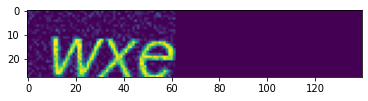

In [164]:
it = iter(val_loader)
features, labels = next(it)
features, labels = next(it)

import itertools 

def predict(out):
  iter = itertools.groupby(torch.argmax(out,dim=2).cpu().numpy()[0])
  x = []
  for i in iter:
    j = i[0]
    if j!= 0:
      x.append(j)
  return x

gpu = torch.device('cpu:0')

def evaluate(val_loader):
  correct = 0
  all = 0
  for features, labels in val_loader:
    out = model(features.to(gpu))
    y_pred = torch.tensor(predict(out[0].cpu()),dtype=torch.int32)
    y_true = labels[0]
    if y_pred.shape[0] == y_true.shape[0]:
      x = y_true == y_true
      if x.all():
        correct+=1
    all+=1
  return correct/all

def pred2str(pred):
  s = ''
  alpha = ' 0123456789abcdefghijklmnopqrstuvwxyz'
  for p in pred: 
    s+=(alpha[p])
  return s

iid = 1
features.shape
out = model(features.to(gpu))
print(torch.argmax(out[0],dim=2).cpu().numpy()[0])
y_pred = predict(out[0].cpu())
y_true = labels[0]
print(y_pred)
# print(pred2str(y_pred))
print(y_true)
print(pred2str(y_pred))
_=plt.imshow(features[0][0])

In [115]:
torch.save(model.cpu(),'typewriter_recog_v3.pth')

In [116]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [119]:
torch.save(model.cpu(),'/content/drive/MyDrive/ml_data/Models/character_recog/typewriter_recog_v3.pth')

In [173]:
im = plt.imread('fucky/2_5.tif')
im.shape

(50, 74)

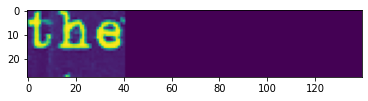

In [178]:
im2 = im/im.max()
im2 = 1.- im2
z = format_image(im2,(28,140))
plt.imshow(z)

In [197]:
z2 = torch.tensor(z>0.1,dtype=torch.float32).unsqueeze(0).unsqueeze(0)
# features.dtype
out = model(z2)

In [198]:
print(torch.argmax(out[0],dim=2).cpu().numpy()[0])

[7 9 4 0 0 0 0 0 0 0 0 0 0 0 0]
